# Analysis of the ''EarSet'' dataset from the paper ''EarSet: A Multi-Modal Dataset for Studying the Impact of Head and Facial Movements  on In-Ear PPG Signals''

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the list of all files and directories in P0 directory
path = '../data/Dataset/P0/EARBUDS/'
dir_list = os.listdir(path)

# Prints all files
#print("Files and directories in '", path, "' :")
#print(dir_list)

# Store the action name for the files in a list
action_name_for_file = ['still', 'nod', 'shake', 'tilt', 'eyes-ud', 'eyes-lr', 'brow-raiser', 'brow-lowerer', 'wink-r',
                        'wink-l', 'lip-puller', 'chin-raiser', 'mouth-stretch-', 'chewing', 'speaking', 'walking', 'running']

# Define an action mapping table with the actions from the paper
actions = ['Still', 'Nod', 'Shake', 'Tilt', 'Vertical Eyes Movements', 'Horizontal Eyes Movements', 'Brow Raiser', 'Brow Lowerer', 'Right Eye Wink', 'Left Eye Wink',
           'Lip Puller', 'Chin Raiser', 'Mouth Stretch', 'Chewing', 'Speaking', 'Walking', 'Running']
atoi = {a:i for i,a in enumerate(actions)}
itoa = {i:a for i,a in enumerate(action_name_for_file)}

print(atoi)

{'Still': 0, 'Nod': 1, 'Shake': 2, 'Tilt': 3, 'Vertical Eyes Movements': 4, 'Horizontal Eyes Movements': 5, 'Brow Raiser': 6, 'Brow Lowerer': 7, 'Right Eye Wink': 8, 'Left Eye Wink': 9, 'Lip Puller': 10, 'Chin Raiser': 11, 'Mouth Stretch': 12, 'Chewing': 13, 'Speaking': 14, 'Walking': 15, 'Running': 16}


In [3]:
# Automate input reading
patient = 0
action = 7
imu = False
ppg = True
right_ear = False
left_ear = True

input_file_path = '../data/Dataset/P'+ str(patient) + '/EARBUDS/' + str(patient) + '-' + action_name_for_file[action] + '-' + ['imu' if imu==1 else ('ppg' if ppg else None)][0] +                  '-' + ['right' if right_ear==1 else ('left' if left_ear else None)][0] + '.csv'
input_file_path

'../data/Dataset/P0/EARBUDS/0-brow-lowerer-ppg-left.csv'

In [4]:
# Read in csv file for further analysis
df_data = pd.read_csv(
    input_file_path,
    sep=',',           # specify delimiter (default is ',')
    header=0,          # row number to use as column names (0 means the first row)
    na_values=['NA', ''],  # specify which values should be considered NaN
    dtype=str          # specify dtype if needed; str is common for raw data
)
df_data

,timestamp,green,ir,red
0,1621356571706,29092,52113,52204
1,1621356571716,29110,83546,83631
2,1621356571726,29106,114998,115086
3,1621356571736,29132,137585,131942
4,1621356571746,29130,137567,131890
...,...,...,...,...
11998,1621356691656,50366,294486,267927
11999,1621356691666,50381,294481,267937
12000,1621356691676,50389,294449,267937
12001,1621356691686,50398,294509,267934


In [5]:
print(df_data.iloc[2961:2964])
print(df_data.iloc[5962:5965])
print(df_data.iloc[9002:9005])

           timestamp         green           ir     red
2961   1621356601316         29616       137360  131729
2962  #1621356601697  current:32ma  tint:14p8us     NaN
2963   1621356601326         29555       137301  131774
           timestamp         green            ir     red
5962   1621356631316         50511        290219  267952
5963  #1621356631697  current:16ma  tint:117p3us     NaN
5964   1621356631326         50476        290227  268009
           timestamp         green            ir     red
9002   1621356661706         29953        140159  131844
9003  #1621356661697  current:32ma  tint:117p3us     NaN
9004   1621356661716         29971        140151  131839


In [6]:
df_data_ppg = df_data[~df_data['timestamp'].astype(str).str.startswith('#')]
df_data_ppg['timestamp'] = pd.to_datetime(df_data_ppg['timestamp'], unit='ms')

/var/folders/ft/8d1p935913j1_tk94srvt2lm0000gn/T/ipykernel_20084/1577072009.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_data_ppg['timestamp'] = pd.to_datetime(df_data_ppg['timestamp'], unit='ms')
/var/folders/ft/8d1p935913j1_tk94srvt2lm0000gn/T/ipykernel_20084/1577072009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_ppg['timestamp'] = pd.to_datetime(df_data_ppg['timestamp'], unit='ms')


In [7]:
print(df_data_ppg.iloc[2961:2964])
print(df_data_ppg.iloc[5962:5965])
print(df_data_ppg.iloc[9002:9005])

                   timestamp  green      ir     red
2961 2021-05-18 16:50:01.316  29616  137360  131729
2963 2021-05-18 16:50:01.326  29555  137301  131774
2964 2021-05-18 16:50:01.336  29591  137410  131795
                   timestamp  green      ir     red
5964 2021-05-18 16:50:31.326  50476  290227  268009
5965 2021-05-18 16:50:31.336  50519  290238  268001
5966 2021-05-18 16:50:31.346  50482  290316  267984
                   timestamp  green      ir     red
9005 2021-05-18 16:51:01.726  29971  140149  131832
9006 2021-05-18 16:51:01.736  29979  140151  131853
9007 2021-05-18 16:51:01.746  50580  221530  172588


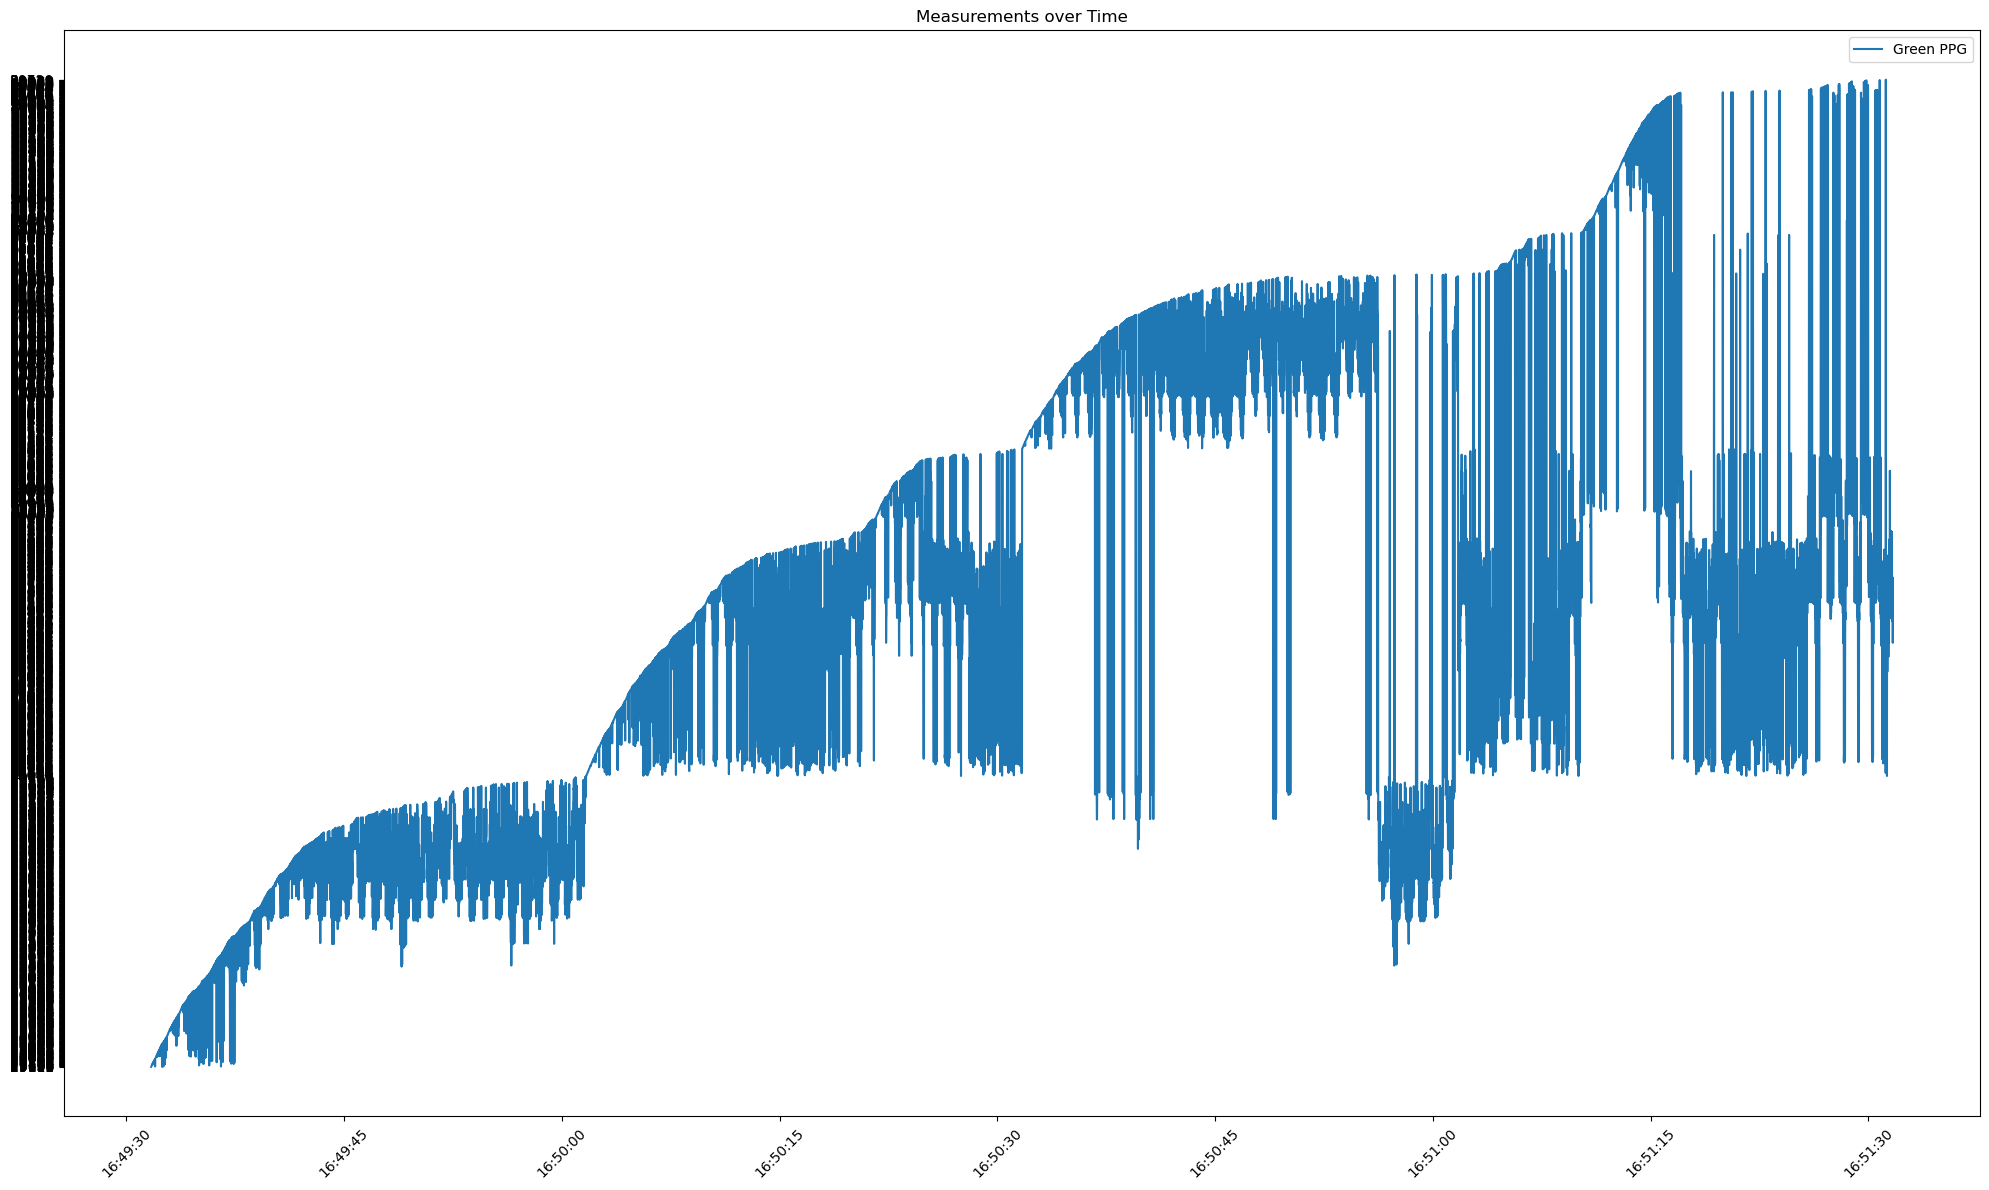

In [8]:
# Plotting the measurements over time
plt.figure(figsize=(20, 12))

# Plot each measurement series over time
plt.plot(df_data_ppg['timestamp'], df_data_ppg['green'], label='Green PPG')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['ir'], label='Measurement 2', marker='o')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['red'], label='Measurement 3', marker='o')

# Labels and legend
plt.title("Measurements over Time")
#plt.xlabel("Timestamp")
#plt.ylabel("Measurement Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
print(df_data['red'][0:100])

0      52204
1      83631
2     115086
3     131942
4     131890
       ...  
95    131685
96    131704
97    131754
98    131715
99    131726
Name: red, Length: 100, dtype: object


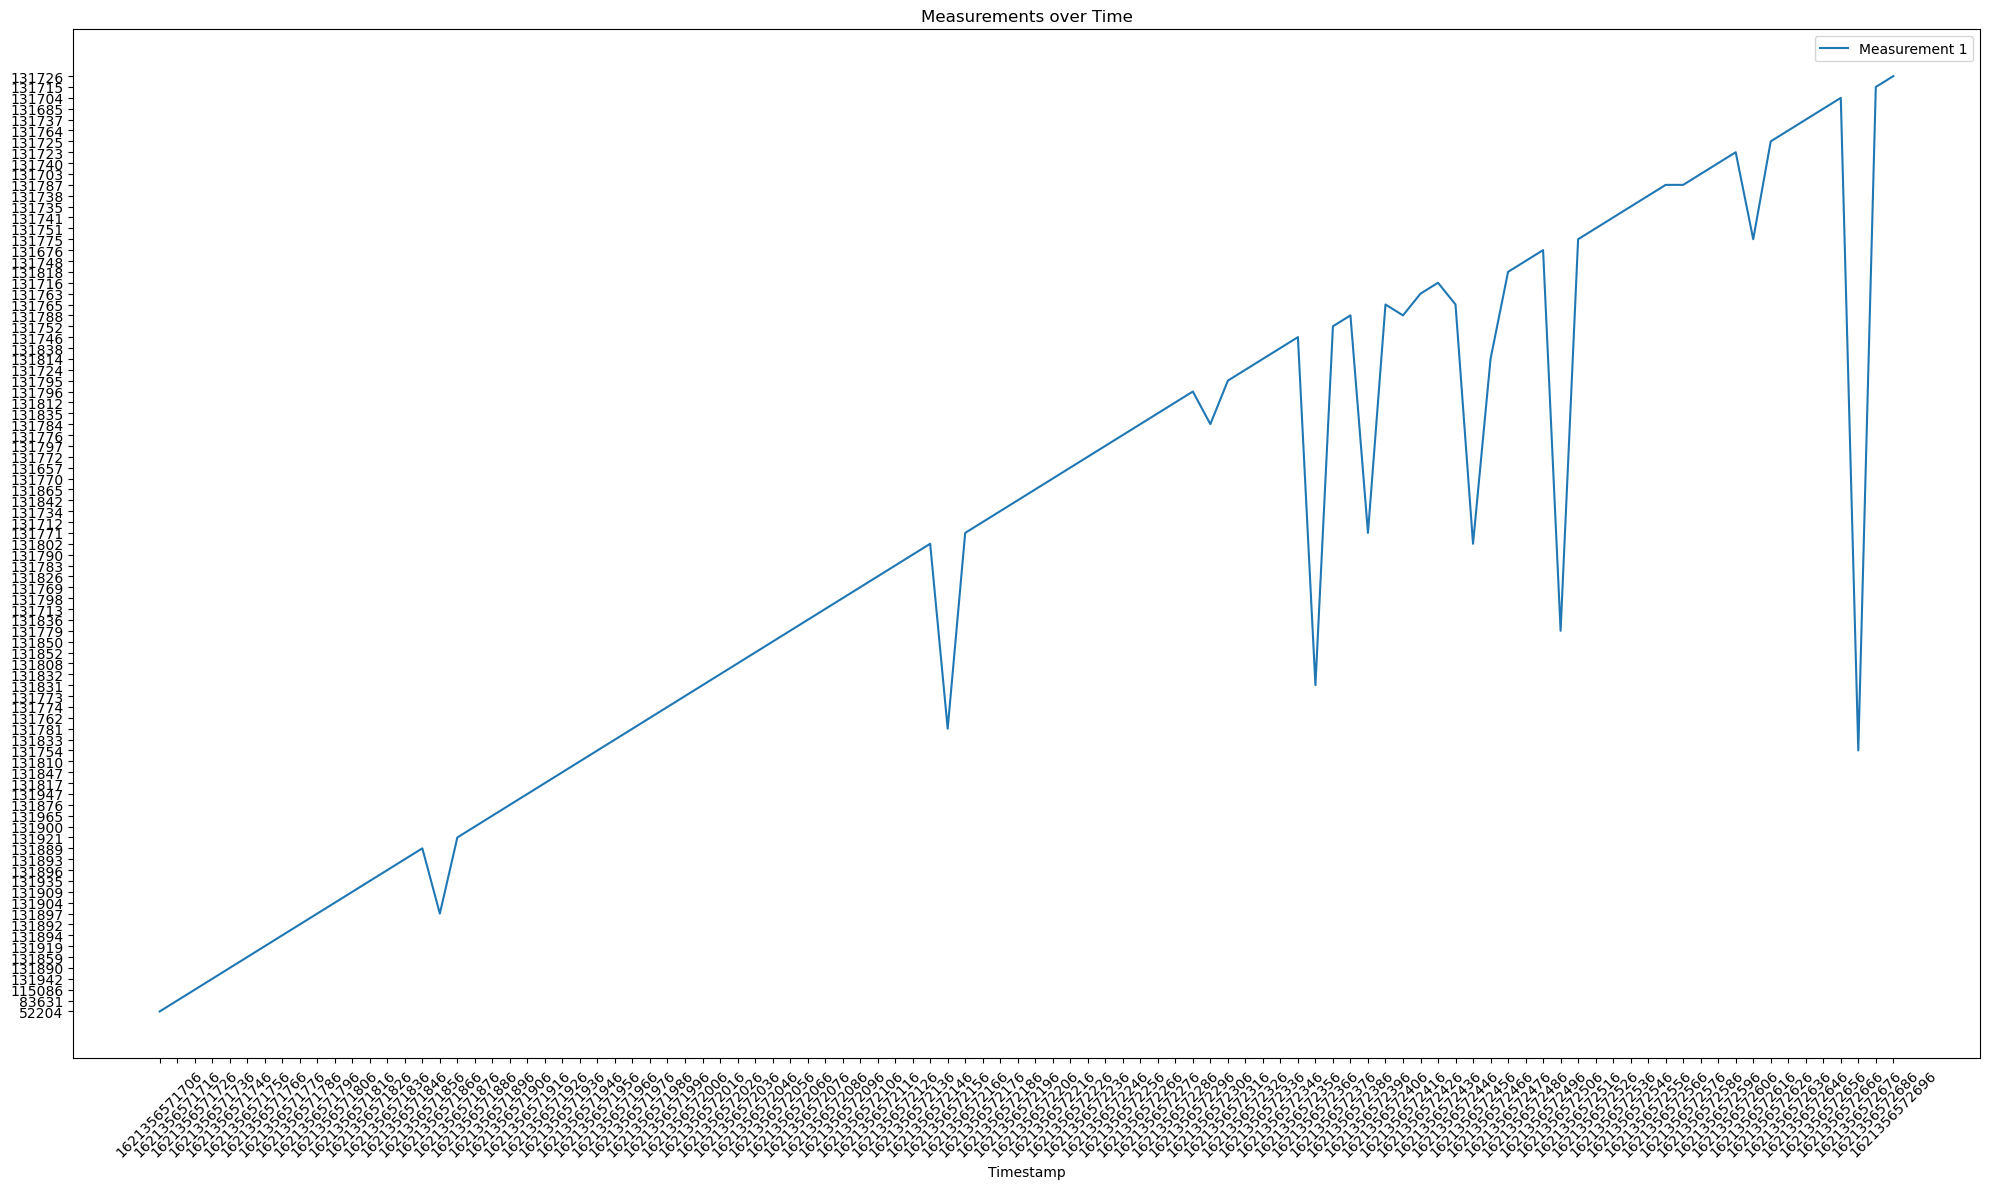

In [9]:
# Plotting the measurements over time
plt.figure(figsize=(20, 12))

# Plot each measurement series over time
plt.plot(df_data['timestamp'][0:100], df_data['red'][0:100], label='Measurement 1')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['ir'], label='Measurement 2', marker='o')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['red'], label='Measurement 3', marker='o')

# Labels and legend
plt.title("Measurements over Time")
plt.xlabel("Timestamp")
#plt.ylabel("Measurement Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)

# Display the plot
plt.tight_layout()
#plt.savefig('../results/data_analysis/', '100_samples')
plt.show()

In [15]:
df_downsampled = df_data_ppg.iloc[::4]
print(df_downsampled)

                    timestamp  green      ir     red
0     2021-05-18 16:49:31.706  29092   52113   52204
4     2021-05-18 16:49:31.746  29130  137567  131890
8     2021-05-18 16:49:31.786  29155  137538  131892
12    2021-05-18 16:49:31.826  29184  137554  131935
16    2021-05-18 16:49:31.866  29200  137569  131897
...                       ...    ...     ...     ...
11983 2021-05-18 16:51:31.506  50359  294421  267885
11987 2021-05-18 16:51:31.546  50356  294406  267915
11991 2021-05-18 16:51:31.586  50348  294462  267873
11995 2021-05-18 16:51:31.626  50360  294434  267907
11999 2021-05-18 16:51:31.666  50381  294481  267937

[3000 rows x 4 columns]


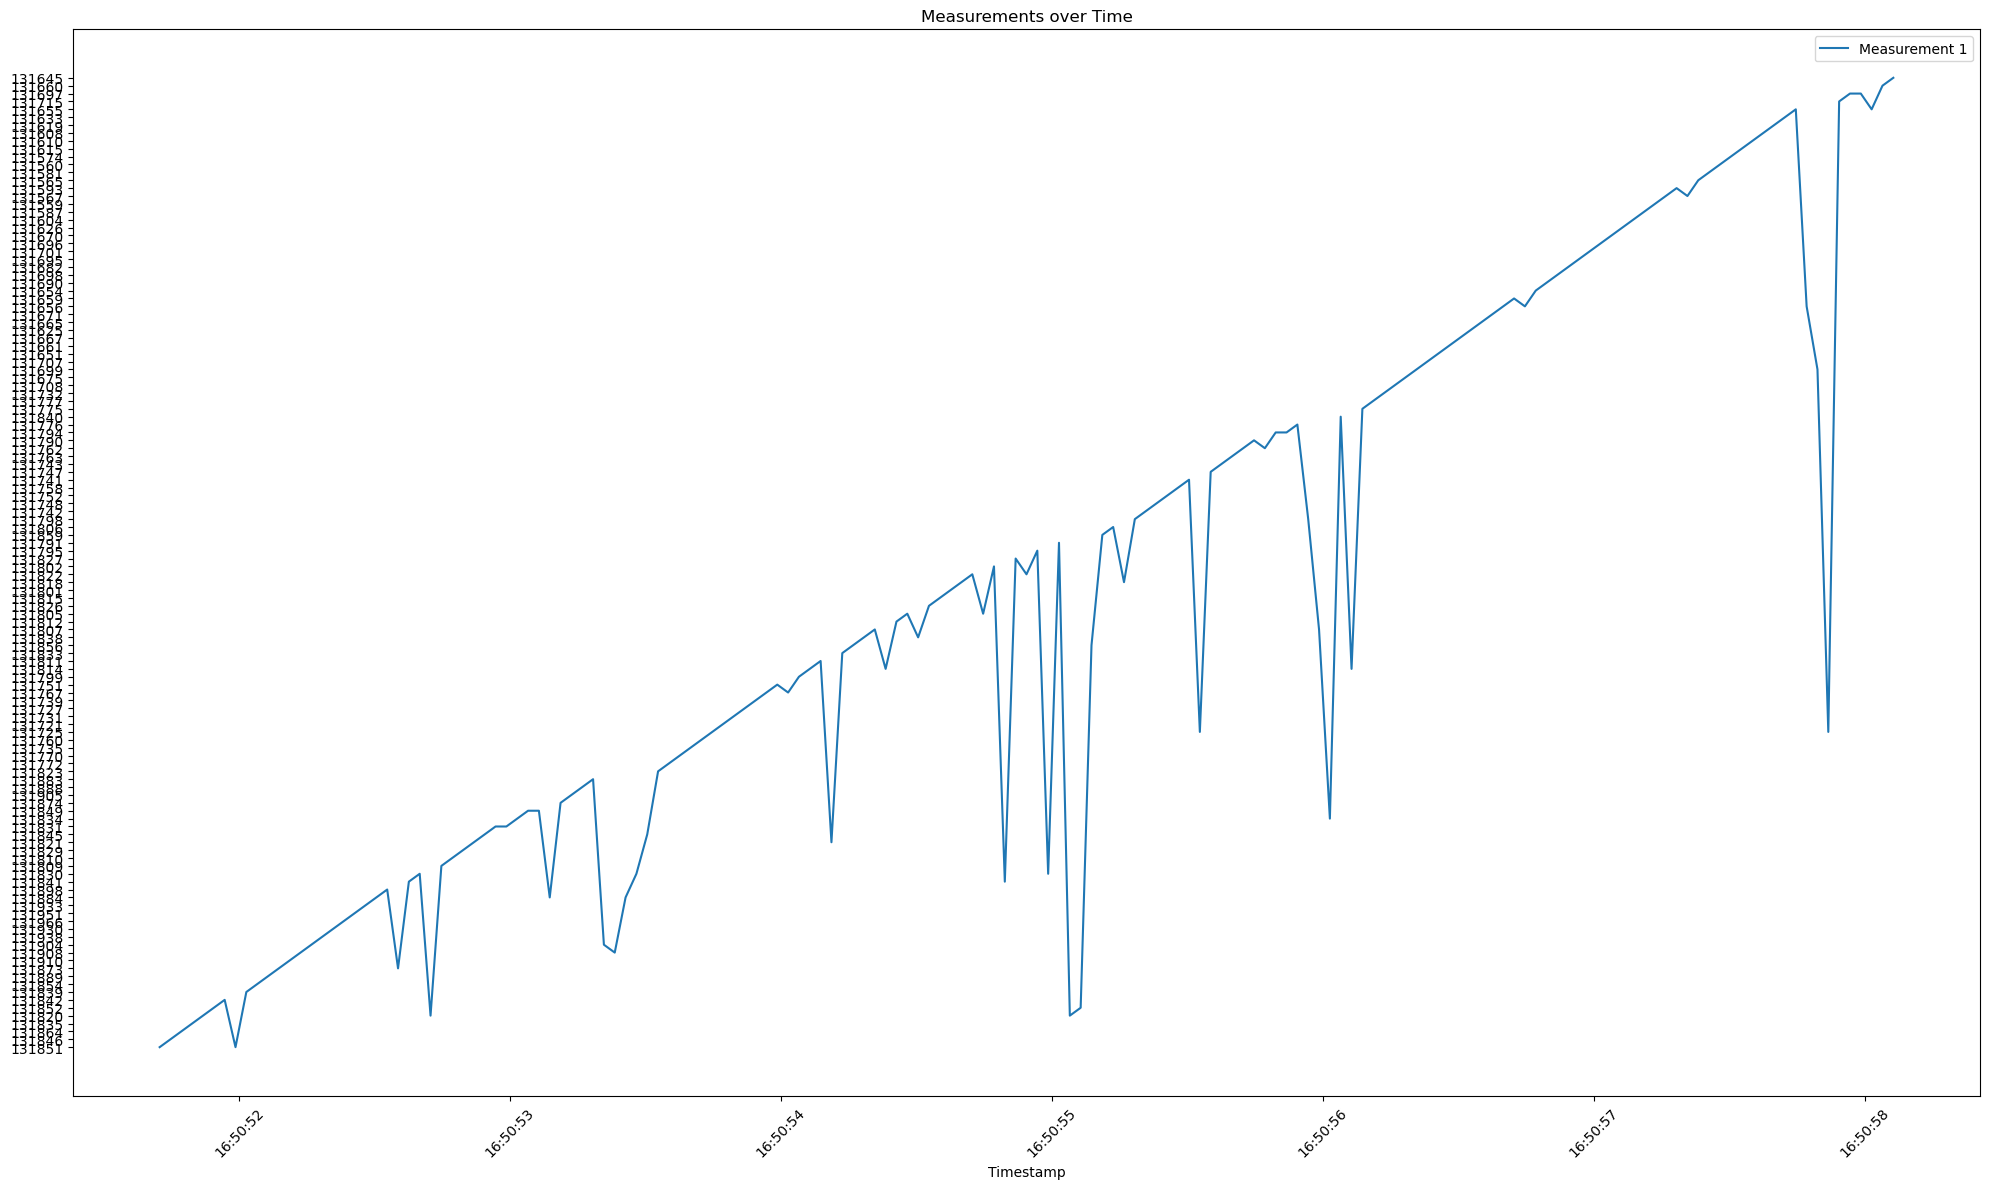

In [16]:
# Plotting the measurements over time
plt.figure(figsize=(20, 12))

# Plot each measurement series over time
plt.plot(df_downsampled['timestamp'][2000:2161], df_downsampled['red'][2000:2161], label='Measurement 1')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['ir'], label='Measurement 2', marker='o')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['red'], label='Measurement 3', marker='o')

# Labels and legend
plt.title("Measurements over Time")
plt.xlabel("Timestamp")
#plt.ylabel("Measurement Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)

# Display the plot
plt.tight_layout()
#plt.savefig('../results/data_analysis/', '100_samples')
plt.show()

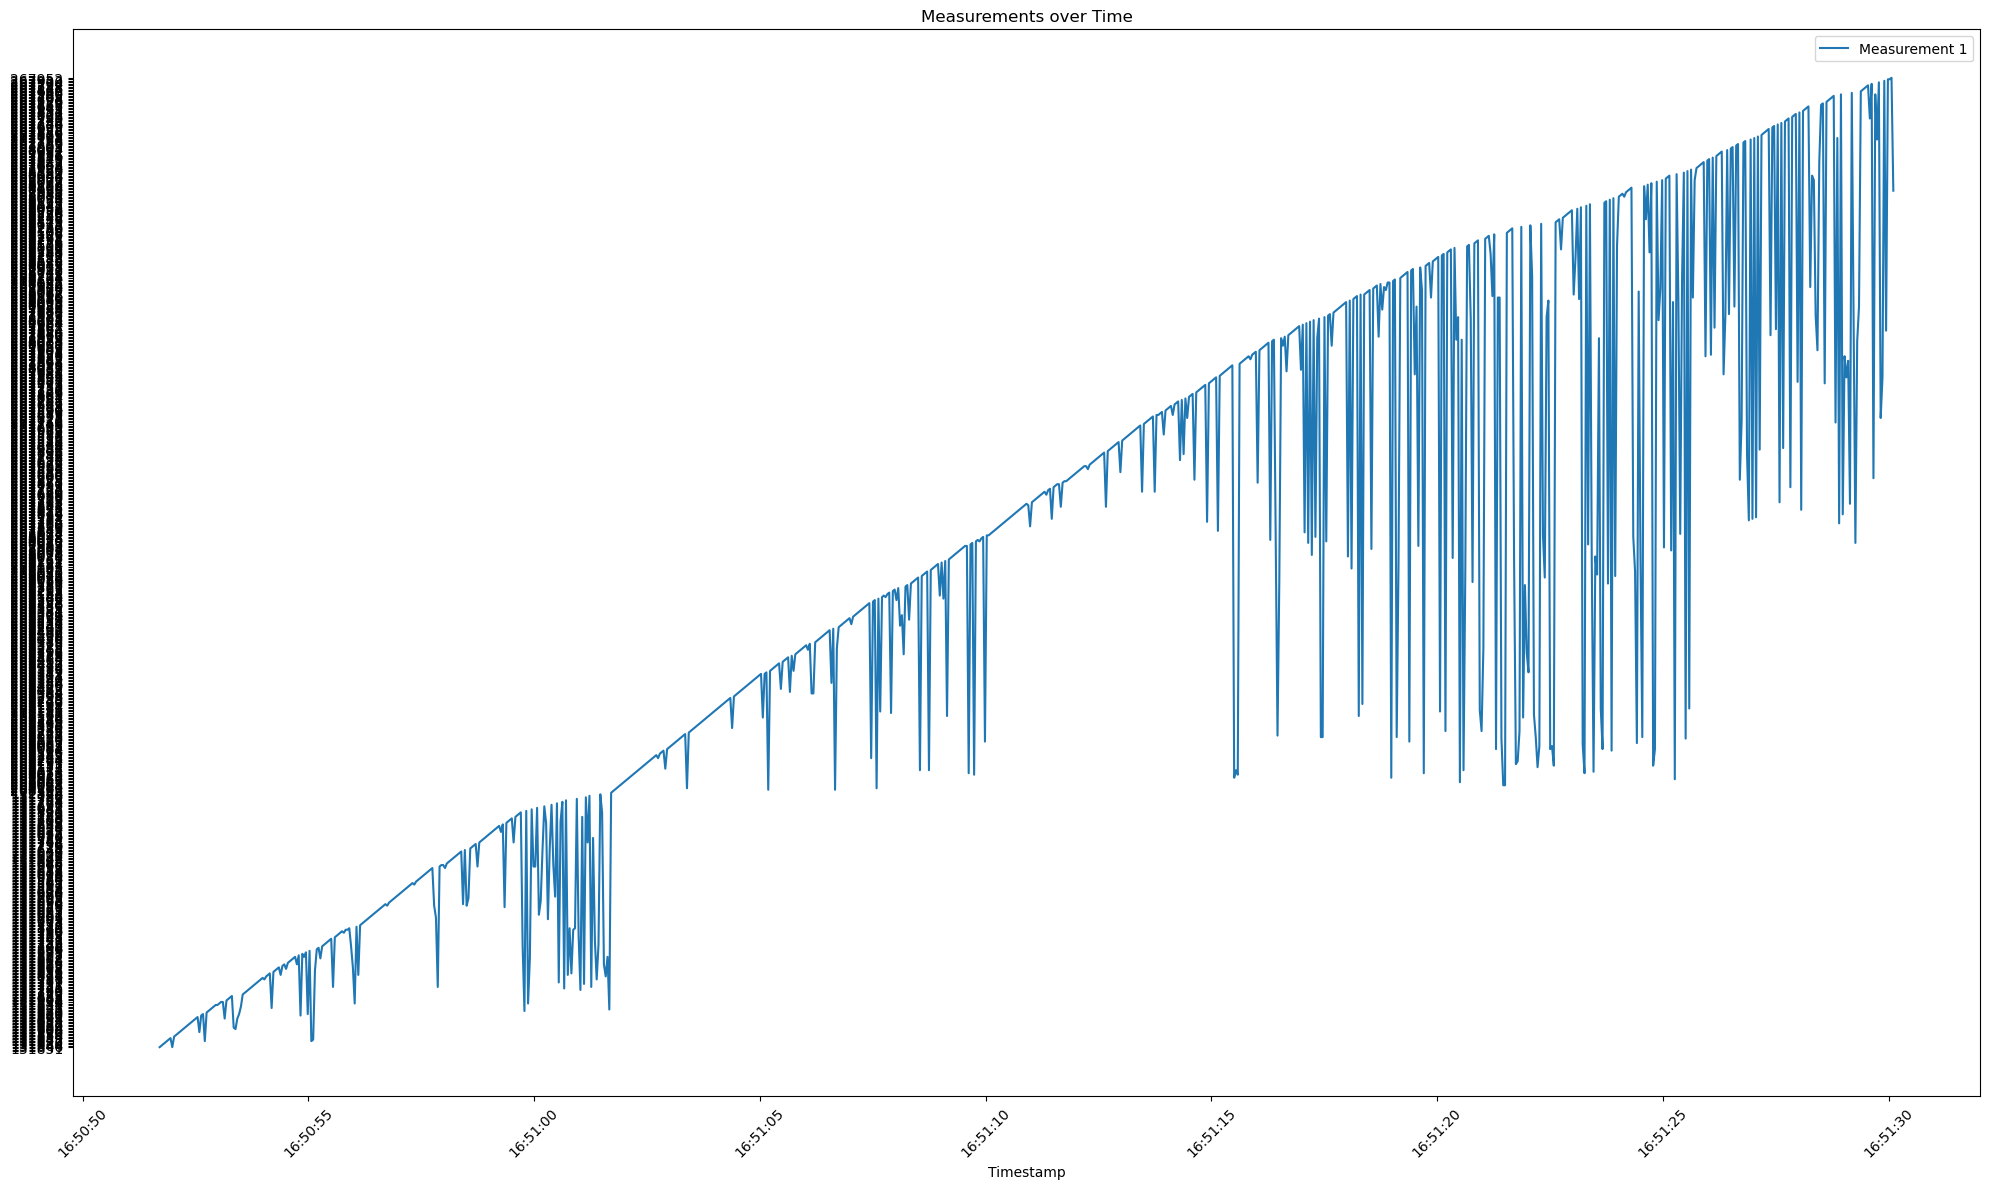

In [17]:
# Plotting the measurements over time
plt.figure(figsize=(20, 12))

# Plot each measurement series over time
plt.plot(df_downsampled['timestamp'][2000:2961], df_downsampled['red'][2000:2961], label='Measurement 1')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['ir'], label='Measurement 2', marker='o')
#plt.plot(df_data_ppg['timestamp'], df_data_ppg['red'], label='Measurement 3', marker='o')

# Labels and legend
plt.title("Measurements over Time")
plt.xlabel("Timestamp")
#plt.ylabel("Measurement Value")
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()

## Check for sensor configuration rows and drop them